In [1]:
import pandas as pd

In [34]:
comportamento_seguros = pd.read_excel("D:/Apostila de R___Centro de Treinamento/trn_02_machine learning não supervisionado/Cluster/k_means/comportamento_seguros_1.xlsx")
comportamento_seguros.head()

,Segmento,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
0,1,1,1,1,1,1,1,1,0,1
1,3,1,1,1,1,0,1,1,1,1
2,2,1,1,1,1,1,1,0,1,0
3,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,0,1,1,0


In [35]:
df = comportamento_seguros.loc[:,'Auto':'Outros']
df.head()

,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
0,1,1,1,1,1,1,1,0,1
1,1,1,1,1,0,1,1,1,1
2,1,1,1,1,1,1,0,1,0
3,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,0,1,1,0


In [36]:
df.describe()

,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.790323,0.835484,0.741935,0.554839,0.732258,0.667742,0.680645,0.558065,0.467742
std,0.407737,0.371343,0.438277,0.497787,0.443498,0.471785,0.466980,0.497420,0.499765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

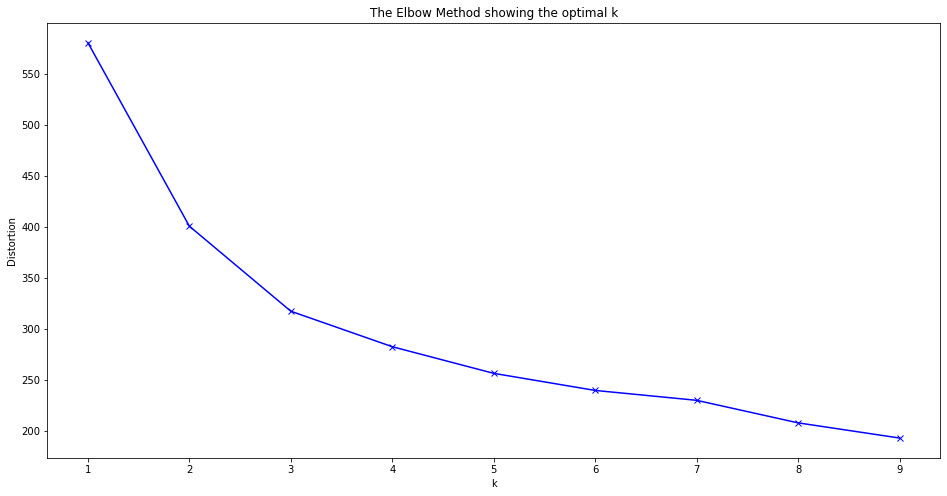

In [38]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [39]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

In [40]:
from sklearn.preprocessing import StandardScaler
# StandardScaler - Padroniza as variáveis para média 0 e DP 1.
# scaler.fit_transform - ajusta e depois padroniza
scaler = StandardScaler()
df_k_means = scaler.fit_transform(df)
df_k_means

array([[ 0.51507875,  0.44374677,  0.58976782, ...,  0.6849776 ,
        -1.12373205,  1.0667385 ],
       [ 0.51507875,  0.44374677,  0.58976782, ...,  0.6849776 ,
         0.88989186,  1.0667385 ],
       [ 0.51507875,  0.44374677,  0.58976782, ..., -1.45990175,
         0.88989186, -0.93743687],
       ...,
       [ 0.51507875, -2.25353752,  0.58976782, ...,  0.6849776 ,
        -1.12373205,  1.0667385 ],
       [-1.94145069, -2.25353752, -1.6955825 , ...,  0.6849776 ,
        -1.12373205,  1.0667385 ],
       [-1.94145069,  0.44374677,  0.58976782, ..., -1.45990175,
         0.88989186,  1.0667385 ]])

In [41]:
# Dados padronizados
df_k_means = pd.DataFrame(df_k_means,columns=['Auto','Saude','Previdencia','Dental','Residencial','Vida','Capitalizacao','Cartoes','Outros'] )
df_k_means

,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
0,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,0.684978,-1.123732,1.066739
1,0.515079,0.443747,0.589768,0.895726,-1.653765,0.705397,0.684978,0.889892,1.066739
2,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,-1.459902,0.889892,-0.937437
3,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,0.684978,-1.123732,-0.937437
4,0.515079,0.443747,0.589768,0.895726,0.604681,-1.417642,0.684978,0.889892,-0.937437
...,...,...,...,...,...,...,...,...,...
305,-1.941451,-2.253538,-1.695582,0.895726,-1.653765,-1.417642,-1.459902,-1.123732,1.066739
306,-1.941451,-2.253538,-1.695582,-1.116412,-1.653765,-1.417642,-1.459902,-1.123732,-0.937437
307,0.515079,-2.253538,0.589768,0.895726,-1.653765,-1.417642,0.684978,-1.123732,1.066739
308,-1.941451,-2.253538,-1.695582,0.895726,-1.653765,0.705397,0.684978,-1.123732,1.066739


In [44]:
df_k_means['k_means']=kmeanModel.predict(df)
df_k_means.head()

,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros,k_means
0,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,0.684978,-1.123732,1.066739,1
1,0.515079,0.443747,0.589768,0.895726,-1.653765,0.705397,0.684978,0.889892,1.066739,1
2,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,-1.459902,0.889892,-0.937437,1
3,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,0.684978,-1.123732,-0.937437,1
4,0.515079,0.443747,0.589768,0.895726,0.604681,-1.417642,0.684978,0.889892,-0.937437,1


In [45]:
df_k_means['k_means'].value_counts()

1    136
2     91
0     83
Name: k_means, dtype: int64

In [49]:
# Criar grafico para entender os cluster
tabela = df_k_means[['k_means','Auto','Saude','Previdencia','Dental','Residencial','Vida','Capitalizacao','Cartoes','Outros']].groupby(['k_means']).mean()
tabela

,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
k_means,,,,,,,,,
0,0.367095,-0.693662,-1.310102,-1.019442,0.550260,-1.008381,-1.123957,0.792850,-0.889143
1,0.478953,0.423914,0.522552,0.703389,0.422012,0.455627,0.385325,0.238425,0.182543
2,-1.050621,-0.000861,0.413972,-0.121399,-1.132585,0.238795,0.449277,-1.079477,0.538165


In [51]:
### Salvando excel
### index = False não salva o índice do arquivo.
escrever = pd.ExcelWriter('D:/Apostila de R___Centro de Treinamento/trn_02_machine learning não supervisionado/tabela_k_means.xlsx')
tabela.to_excel(escrever, index=False)
escrever.save()

In [54]:
#import numpy as np
df_k_means['k_means']= df_k_means['k_means'].map ({0:'Bronze', 1:'Ouro', 2:'Prata'})
df_k_means.head()

,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros,k_means
0,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,0.684978,-1.123732,1.066739,Ouro
1,0.515079,0.443747,0.589768,0.895726,-1.653765,0.705397,0.684978,0.889892,1.066739,Ouro
2,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,-1.459902,0.889892,-0.937437,Ouro
3,0.515079,0.443747,0.589768,0.895726,0.604681,0.705397,0.684978,-1.123732,-0.937437,Ouro
4,0.515079,0.443747,0.589768,0.895726,0.604681,-1.417642,0.684978,0.889892,-0.937437,Ouro


In [55]:
k = df_k_means['k_means']
k

0        Ouro
1        Ouro
2        Ouro
3        Ouro
4        Ouro
        ...  
305     Prata
306    Bronze
307     Prata
308     Prata
309      Ouro
Name: k_means, Length: 310, dtype: object

In [60]:
unir = pd.concat([k,comportamento_seguros], axis=1)
unir

,k_means,Segmento,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
0,Ouro,1,1,1,1,1,1,1,1,0,1
1,Ouro,3,1,1,1,1,0,1,1,1,1
2,Ouro,2,1,1,1,1,1,1,0,1,0
3,Ouro,1,1,1,1,1,1,1,1,0,0
4,Ouro,1,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
305,Prata,5,0,0,0,1,0,0,0,0,1
306,Bronze,5,0,0,0,0,0,0,0,0,0
307,Prata,1,1,0,1,1,0,0,1,0,1
308,Prata,1,0,0,0,1,0,1,1,0,1


In [62]:
unir['Segmento'].value_counts()

1    112
3     89
2     75
4     29
5      5
Name: Segmento, dtype: int64

In [64]:

unir['Segmento']= unir['Segmento'].map ({1:'Marketing', 2:'Medicina', 3:'Financas', 4:'Industria', 5:'Outras'})
unir.head()

,k_means,Segmento,Auto,Saude,Previdencia,Dental,Residencial,Vida,Capitalizacao,Cartoes,Outros
0,Ouro,Marketing,1,1,1,1,1,1,1,0,1
1,Ouro,Financas,1,1,1,1,0,1,1,1,1
2,Ouro,Medicina,1,1,1,1,1,1,0,1,0
3,Ouro,Marketing,1,1,1,1,1,1,1,0,0
4,Ouro,Marketing,1,1,1,1,1,0,1,1,0


In [65]:
pd.crosstab(unir.Segmento, unir.k_means)

k_means,Bronze,Ouro,Prata
Segmento,,,
Financas,12,36,41
Industria,6,12,11
Marketing,55,46,11
Medicina,7,41,27
Outras,3,1,1
